In [1]:
import pandas as pd
import numpy as np
from alepython import ale_plot

In [2]:
#loading data
total_data = pd.read_csv('hotel_bookings_ohe.csv')
train_index = pd.read_csv('train_index.csv')

In [3]:
#select train data from training index
train = total_data.iloc[train_index.Train_Index,:]
train.reset_index(inplace=True)
train.head()

,index,arrival_date_year,adults,children,babies,previous_cancellations,booking_changes,total_of_special_requests,log_lead_time,total_nights,...,market_segment_Online TA,market_segment_Undefined,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,required_car_parking_0,required_car_parking_1,is_canceled
0,35564,2017,2,0,0,0,0,1,4.663439,2,...,1,0,0,0,1,0,0,1,0,0
1,24402,2016,1,0,0,0,0,0,0.000000,1,...,0,0,1,0,0,0,0,1,0,0
2,117756,2017,2,1,1,0,1,1,5.135798,7,...,1,0,1,0,0,0,0,1,0,0
3,5653,2016,2,0,0,0,0,0,3.044522,2,...,0,0,1,0,0,0,0,1,0,1
4,105241,2017,1,0,0,0,0,0,0.693147,1,...,0,0,1,0,0,0,0,1,0,0


In [4]:
#select test data
test = total_data.iloc[total_data.index.difference(train_index.Train_Index),:]
test.reset_index(inplace=True)
test.head()

,index,arrival_date_year,adults,children,babies,previous_cancellations,booking_changes,total_of_special_requests,log_lead_time,total_nights,...,market_segment_Online TA,market_segment_Undefined,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,required_car_parking_0,required_car_parking_1,is_canceled
0,2,2015,1,0,0,0,0,0,2.079442,1,...,0,0,1,0,0,0,0,1,0,0
1,3,2015,1,0,0,0,0,0,2.639057,1,...,0,0,1,0,0,0,0,1,0,0
2,8,2015,2,0,0,0,0,1,4.454347,3,...,1,0,1,0,0,0,0,1,0,1
3,9,2015,2,0,0,0,0,0,4.330733,3,...,0,0,0,0,1,0,0,1,0,1
4,10,2015,2,0,0,0,0,0,3.178054,4,...,1,0,1,0,0,0,0,1,0,1


In [5]:
#select train x, train y, test x, test y
train_x = train.drop(['index','is_canceled'],axis=1)
train_y = train['is_canceled']

test_x = test.drop(['index','is_canceled'],axis=1)
test_y = test['is_canceled']

In [9]:
#for visualization purpose
ale_df = pd.DataFrame(train_x)
ale_df.columns  = train.drop(columns = ["index","is_canceled"]).columns
ale_df.head()

,arrival_date_year,adults,children,babies,previous_cancellations,booking_changes,total_of_special_requests,log_lead_time,total_nights,previous_bookings,...,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,required_car_parking_0,required_car_parking_1
0,2017,2,0,0,0,0,1,4.663439,2,0,...,0,1,0,0,0,1,0,0,1,0
1,2016,1,0,0,0,0,0,0.000000,1,0,...,0,0,0,1,0,0,0,0,1,0
2,2017,2,1,1,0,1,1,5.135798,7,0,...,0,1,0,1,0,0,0,0,1,0
3,2016,2,0,0,0,0,0,3.044522,2,0,...,0,0,0,1,0,0,0,0,1,0
4,2017,1,0,0,0,0,0,0.693147,1,0,...,0,0,0,1,0,0,0,0,1,0


# Decision Tree Classifier

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7,10,15,20],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2','auto'],
    'ccp_alpha':[0.1,0.01,0.001]
}

# Create a decision tree classifier object
classifier = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(classifier, param_grid, cv=10, scoring='roc_auc')

# Fit the GridSearchCV object to the data
grid_search.fit(train_x, train_y)



GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15, 20],
                         'max_features': [None, 'sqrt', 'log2', 'auto']},
             scoring='roc_auc')

In [7]:
#the best model in Naive Bayes Classifiers
print('Best hyperparameters:', grid_search.best_params_)
print('Best cross-validation AUC score:', grid_search.best_score_)

Best hyperparameters: {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 15, 'max_features': None}
Best cross-validation AUC score: 0.9154021714185694


In [28]:
#retrain the model by using all data
import time
train_time = time.time()

decisionTree_retrain = DecisionTreeClassifier(criterion='entropy', max_depth =15, max_features = None,ccp_alpha=0.001)
decisionTree_retrain.fit(train_x, train_y)

train_time = time.time() - train_time

print('Decision Tree Running time: ',train_time )

Decision Tree Running time:  0.516110897064209


In [29]:
y_pred = decisionTree_retrain.predict(test_x)

# Performance Evaluation

In [30]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
import seaborn as sns 
cm = confusion_matrix(test_y, y_pred)
cm

array([[13621,  1428],
       [ 2358,  6470]])

In [31]:
#classification metrices in test set [f1-score]
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     15049
           1       0.82      0.73      0.77      8828

    accuracy                           0.84     23877
   macro avg       0.84      0.82      0.83     23877
weighted avg       0.84      0.84      0.84     23877



In [32]:
# Compute the misclassification rate
cm = confusion_matrix(test_y, y_pred)

misclass_rate = (cm[0,1] + cm[1,0]) / sum(sum(cm))

print("Misclassification rate in test dataset: ", misclass_rate)

Misclassification rate in test dataset:  0.15856263349667044


In [33]:
#AUC performance in test set
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(test_y, y_pred)
print('ROC AUC in test dataset : {:.4f}'.format(ROC_AUC))

ROC AUC in test dataset : 0.8190


## Interpretation for Decision Tree

/tmp/ipykernel_753431/3231357155.py:13: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.barh(importances['feature'][-20:], importances['importance'][-20:])


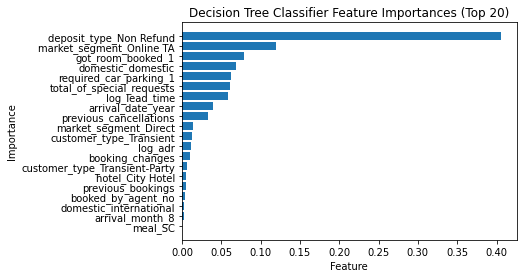

In [54]:
import matplotlib.pyplot as plt


# create a dataframe with feature importances
importances = pd.DataFrame({'feature': train_x.columns,
                            'importance': decisionTree_retrain.feature_importances_})

# sort the dataframe by feature importance in descending order
importances = importances.sort_values(by='importance', ascending=True)


# plot top 20 feature importances
plt.barh(importances['feature'][-20:], importances['importance'][-20:])
#plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Decision Tree Classifier Feature Importances (Top 20)')
plt.show()

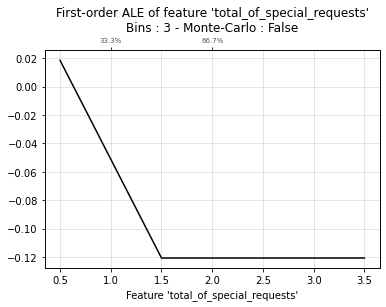

<AxesSubplot: title={'center': "First-order ALE of feature 'total_of_special_requests'\nBins : 3 - Monte-Carlo : False"}, xlabel="Feature 'total_of_special_requests'">

In [55]:
ale_plot(decisionTree_retrain, ale_df,'total_of_special_requests', bins=20)

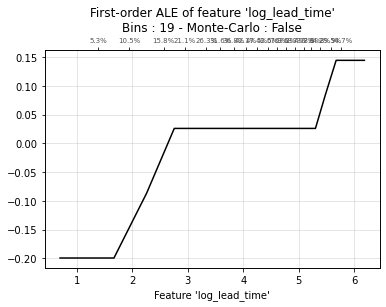

<AxesSubplot: title={'center': "First-order ALE of feature 'log_lead_time'\nBins : 19 - Monte-Carlo : False"}, xlabel="Feature 'log_lead_time'">

In [56]:
ale_plot(decisionTree_retrain, ale_df,'log_lead_time', bins=20)

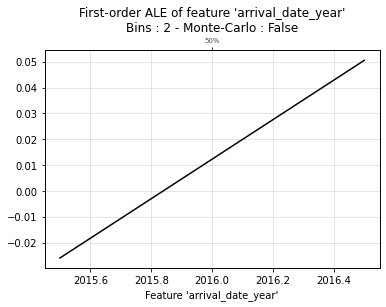

<AxesSubplot: title={'center': "First-order ALE of feature 'arrival_date_year'\nBins : 2 - Monte-Carlo : False"}, xlabel="Feature 'arrival_date_year'">

In [57]:
ale_plot(decisionTree_retrain, ale_df,'arrival_date_year', bins=20)

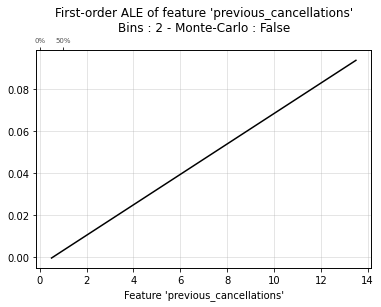

<AxesSubplot: title={'center': "First-order ALE of feature 'previous_cancellations'\nBins : 2 - Monte-Carlo : False"}, xlabel="Feature 'previous_cancellations'">

In [58]:
ale_plot(decisionTree_retrain, ale_df,'previous_cancellations', bins=20)

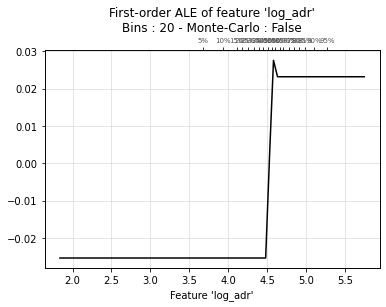

<AxesSubplot: title={'center': "First-order ALE of feature 'log_adr'\nBins : 20 - Monte-Carlo : False"}, xlabel="Feature 'log_adr'">

In [59]:
ale_plot(decisionTree_retrain, ale_df,'log_adr', bins=20)

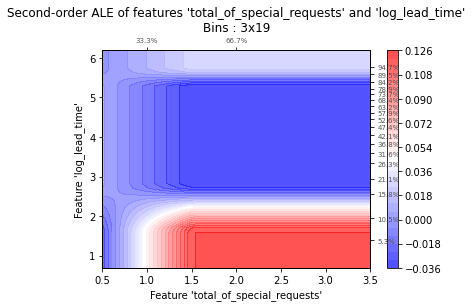

<AxesSubplot: title={'center': "Second-order ALE of features 'total_of_special_requests' and 'log_lead_time'\nBins : 3x19"}, xlabel="Feature 'total_of_special_requests'", ylabel="Feature 'log_lead_time'">

In [60]:
ale_plot(decisionTree_retrain, ale_df,['total_of_special_requests','log_lead_time'], bins=20)

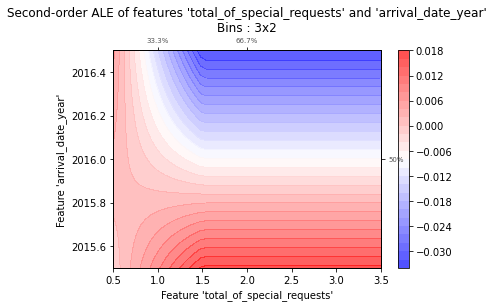

<AxesSubplot: title={'center': "Second-order ALE of features 'total_of_special_requests' and 'arrival_date_year'\nBins : 3x2"}, xlabel="Feature 'total_of_special_requests'", ylabel="Feature 'arrival_date_year'">

In [61]:
ale_plot(decisionTree_retrain, ale_df,['total_of_special_requests','arrival_date_year'], bins=20)

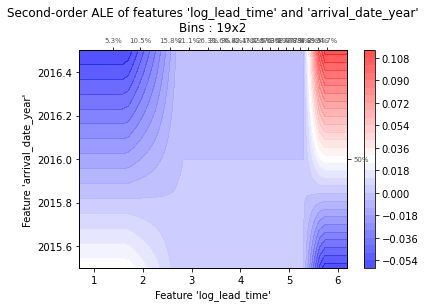

<AxesSubplot: title={'center': "Second-order ALE of features 'log_lead_time' and 'arrival_date_year'\nBins : 19x2"}, xlabel="Feature 'log_lead_time'", ylabel="Feature 'arrival_date_year'">

In [62]:
ale_plot(decisionTree_retrain, ale_df,['log_lead_time','arrival_date_year'], bins=20)